In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def make_bins(dnl):
    bins = [0]
    for d in dnl:
        last_edge = bins[-1]
        bins.append(last_edge + 1 + d)
    return np.array(bins)

First Generate some "raw" data and a "smoothed" version of the data. These are contrived, but illustrate the problem. These curves extend from codes 0 - 998, with a repeating pattern, so only codes 0-10 are plotted. They have the same integrated area under the curve.

In [ ]:
counts = np.tile([0.8, 1.1, 1.1], 333)
filtered = np.tile([0.9, 1.05, 1.05], 333)
print(counts.sum(), filtered.sum())
binNumber = np.arange(999)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(binNumber, counts, ds="steps-post", label="Raw")
ax.plot(binNumber, filtered, ds="steps-post", label="Filtered")
ax.set_ylabel("Counts", fontsize=18)
ax.set_xlabel("Code", fontsize=18)
ax.tick_params(labelsize=16)
ax.set_xlim(0, 10)
ax.set_ylim(0, 1.15)
ax.legend(fontsize=18)
ax.set_title("Illustrative Raw and Filtered Data", fontsize=22)
plt.show()

Calculate DNL in the usual way, build model ADC recursively, and calculate the INL

In [ ]:
dnl = counts / filtered - 1
dnlBins = make_bins(dnl)
idealBinMids = np.arange(999) + 0.5
dnlBinMids = (dnlBins[1:] + dnlBins[:-1]) / 2
inl = idealBinMids - dnlBinMids

The DNL mean is small, but nonzero, which will lead to large integral nonlinearities over a large enough range of codes. A mean DNL of 5e-3 will lead to an accumulated INL of 5 after 1000 codes.

In [ ]:
print(dnl.mean())

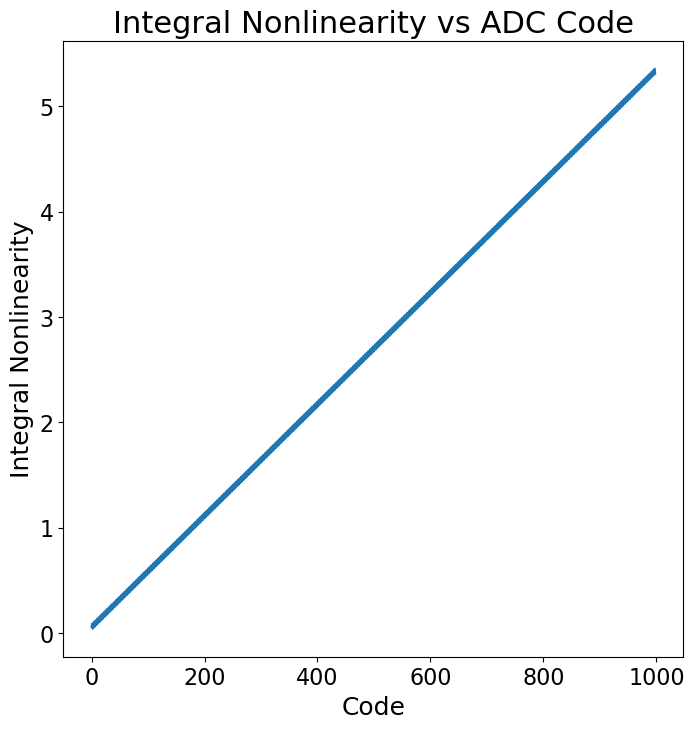

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(binNumber, inl)
ax.set_ylabel("Integral Nonlinearity", fontsize=18)
ax.set_xlabel("Code", fontsize=18)
ax.tick_params(labelsize=16)
ax.set_title("Integral Nonlinearity vs ADC Code", fontsize=22)
plt.show()

Here's a zoomed-in plot showing that the general trend is slightly upward. The large INLs are a cumulative effect.

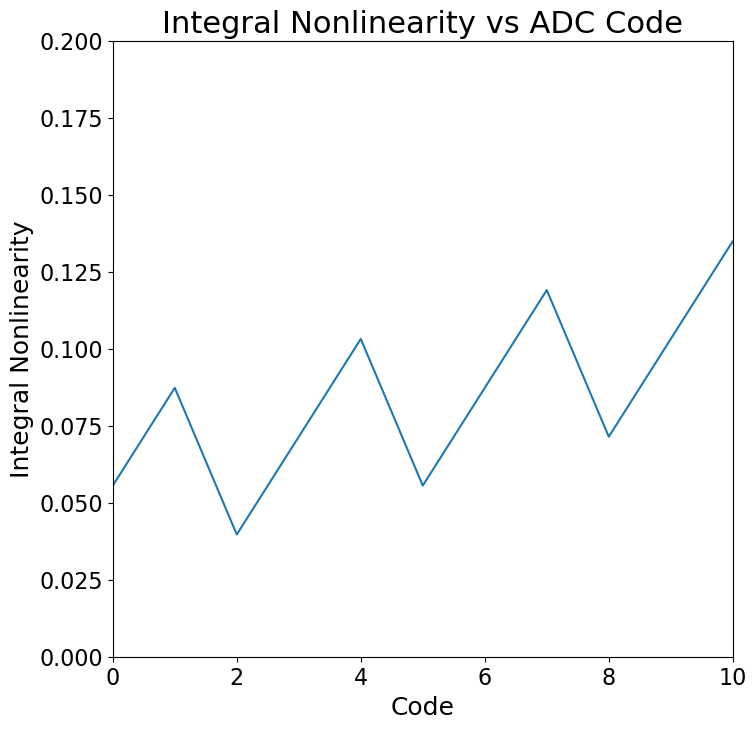

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(binNumber, inl)
ax.set_ylabel("Integral Nonlinearity", fontsize=18)
ax.set_xlabel("Code", fontsize=18)
ax.set_xlim((0, 10))
ax.set_ylim((0, 0.2))
ax.tick_params(labelsize=16)
ax.set_title("Integral Nonlinearity vs ADC Code", fontsize=22)
plt.show()